# Fase4_K-means_Grupo47

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [60]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [61]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [62]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
# Reevisamos las columnas para luego cambiar los nombres a español y hacer mas comodo el trabajo
print(Datos.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [65]:
# Se define un nuevo conjunto de nombres para las columnas
columnasEspanol = {'CustomerID': 'id', 'Gender':'genero', 'Age': 'edad', 
                   'Annual Income (k$)': 'ingresoAnual','Spending Score (1-100)': 'puntuacionGasto'}
# Se renombran las columnas
Datos = Datos.rename(columns=columnasEspanol)

In [66]:
# confirmar el cambio en los encabezados de columna
Datos.head(5)

,id,genero,edad,ingresoAnual,puntuacionGasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Descripción de las variables

- **id**: Identificación única de cada cliente.
  
- **genero**: Género del cliente, puede ser "Masculino" o "Femenino".

- **edad**: Edad del cliente.

- **ingresoAnual**: Ingreso anual del cliente.

- **puntuacionGasto**: Puntuación asignada al cliente según su historial de gastos en la tienda, dicha puntuación está entre 1 a 100.


In [67]:
#Revisamos que los datos esten completos y luego vemos la descripción estadistica de los datos
Datos.shape

(200, 5)

In [68]:
#Confirmamos si hay datos faltantes, en este caso no los hay
Datos.isna().sum()

id                 0
genero             0
edad               0
ingresoAnual       0
puntuacionGasto    0
dtype: int64

In [69]:
#Revisamos correlaciones entre las variables
predictors_col = ['ingresoAnual', 'puntuacionGasto']
target_col = ['edad']

In [70]:
predictors = Datos[predictors_col]
target = Datos[target_col]

<Axes: >

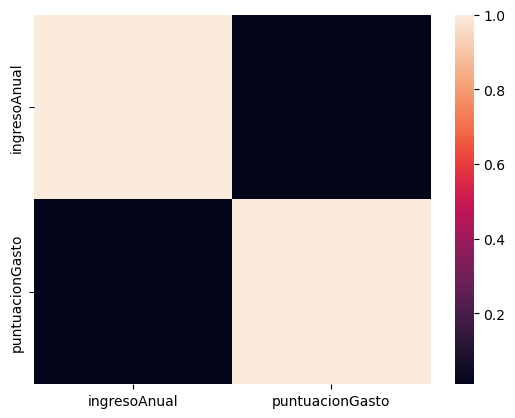

In [71]:
corr = predictors.corr()
sns.heatmap(corr)

Existe una correlación positiva moderada entre estas dos variables. Esto significa que a medida que el ingreso anual de un cliente aumenta, su puntuación de gasto tiende a aumentar también. Esto es coherente con la intuición de que las personas con ingresos más altos tienden a gastar más en general.

Sin embargo, la correlación no es muy fuerte, lo que sugiere que aunque hay una tendencia general, hay muchas otras influencias en la puntuación de gasto de un cliente que no están directamente relacionadas con su ingreso anual.


[Text(0.5, 1.0, 'puntuacionGasto')]

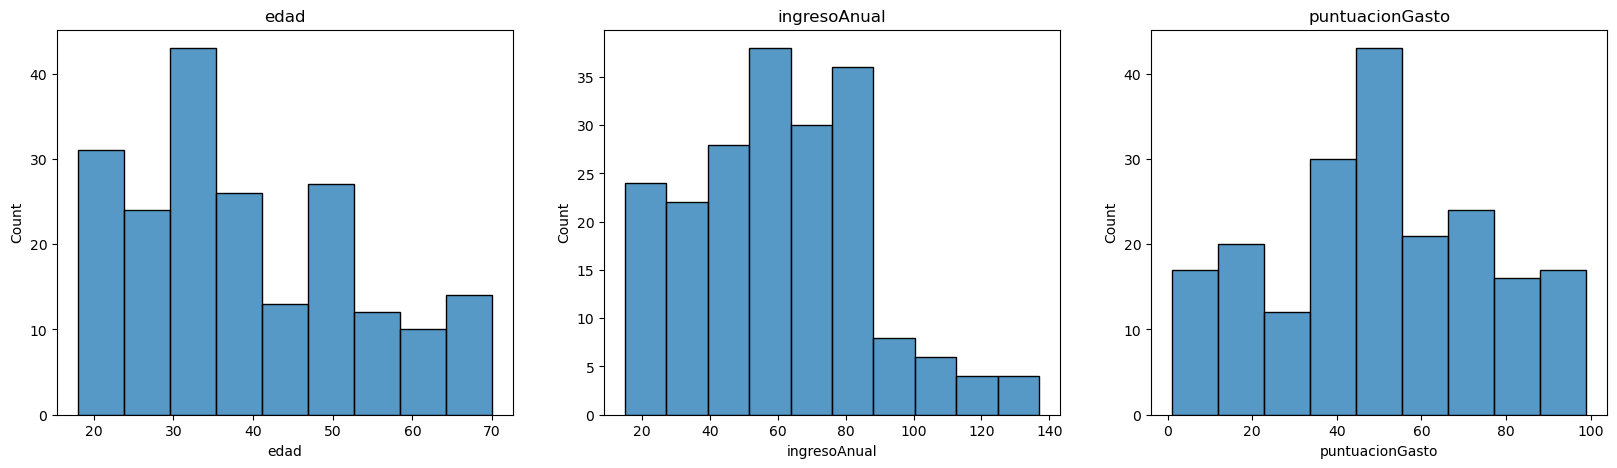

In [72]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(x=Datos["edad"], ax=axes[0]).set(title="edad")
sns.histplot(x=Datos["ingresoAnual"], ax=axes[1]).set(title="ingresoAnual")
sns.histplot(x=Datos["puntuacionGasto"], ax=axes[2]).set(title="puntuacionGasto")



Edad:
La mayoría de los clientes tienen entre 20 y 40 años.
Hay una distribución aproximadamente uniforme entre estas edades, con una ligera disminución después de los 40 años.

Ingreso Anual:
La distribución de ingresos anuales parece ser sesgada hacia la izquierda, lo que indica que la mayoría de los clientes tienen ingresos anuales más bajos.
Sin embargo, hay algunos clientes con ingresos anuales más altos, como se evidencia por las barras en el extremo derecho del histograma.

Puntuación de Gasto:
La puntuación de gasto parece seguir una distribución casi uniforme, con algunos picos en ciertos rangos.
Esto sugiere que hay una variedad de clientes con diferentes niveles de puntuación de gasto, pero no hay una tendencia clara hacia un rango específico.


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [73]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en ingresoAnual: ",Datos['ingresoAnual'].isin([0]).sum())
print("Cantidad de Registros con cero en puntuacionGasto: ",Datos['puntuacionGasto'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en ingresoAnual:  0
Cantidad de Registros con cero en puntuacionGasto:  0


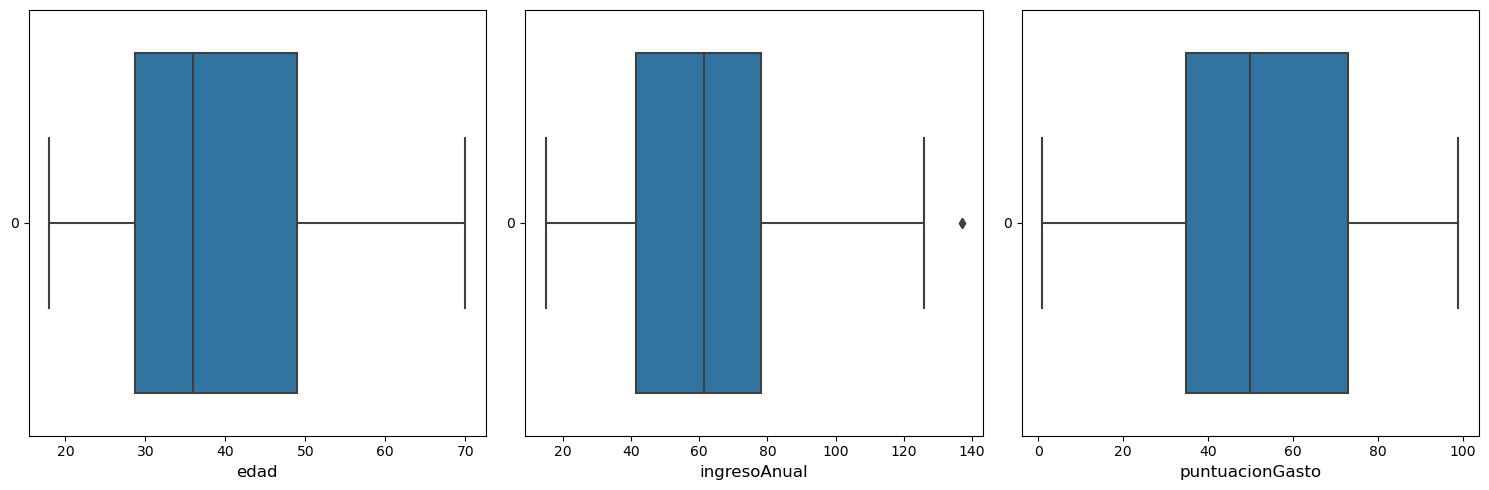

In [74]:
# Identificación de datos atípicos

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Mantenemos la disposición de filas y columnas

# Crear boxplot para 'edad'
sns.boxplot(Datos['edad'], ax=axs[0], orient='h')
axs[0].set_xlabel('edad', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'ingresoAnual'
sns.boxplot(Datos['ingresoAnual'], ax=axs[1], orient='h')
axs[1].set_xlabel('ingresoAnual', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'puntuacionGasto'
sns.boxplot(Datos['puntuacionGasto'], ax=axs[2], orient='h')
axs[2].set_xlabel('puntuacionGasto', fontsize=12)  # Cambiamos a 'xlabel'

plt.tight_layout()

In [75]:
#Conteo de Datos Atípicos

# nivel_minimo=0
nivel_maximo=130
Total_Atipicos=((Datos['ingresoAnual']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [76]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['ingresoAnual']<nivel_maximo)]

In [77]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               198 non-null    int64 
 1   genero           198 non-null    object
 2   edad             198 non-null    int64 
 3   ingresoAnual     198 non-null    int64 
 4   puntuacionGasto  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


In [78]:
# Descripción de los datos
Datos.describe()

,id,edad,ingresoAnual,puntuacionGasto
count,198.000000,198.000000,198.000000,198.000000
mean,99.500000,38.929293,59.787879,50.196970
std,57.301832,14.016852,25.237259,25.746846
min,1.000000,18.000000,15.000000,1.000000
25%,50.250000,28.250000,40.500000,35.000000
50%,99.500000,36.000000,61.000000,50.000000
75%,148.750000,49.000000,77.750000,72.750000
max,198.000000,70.000000,126.000000,99.000000


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [79]:
# Filtrar columnas del modelo 

Datos = Datos[["edad","ingresoAnual","puntuacionGasto"]]

In [80]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,edad,ingresoAnual,puntuacionGasto
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


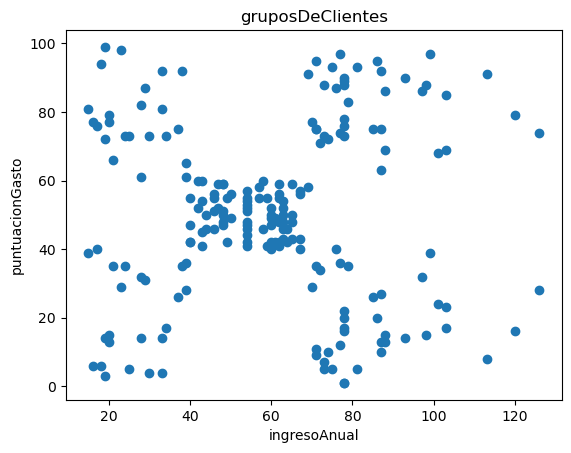

In [81]:
# Grafica antes del agrupamiento

plt.scatter(Datos['ingresoAnual'], Datos['puntuacionGasto'])
plt.xlabel('ingresoAnual')
plt.ylabel('puntuacionGasto')
plt.title('gruposDeClientes')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros

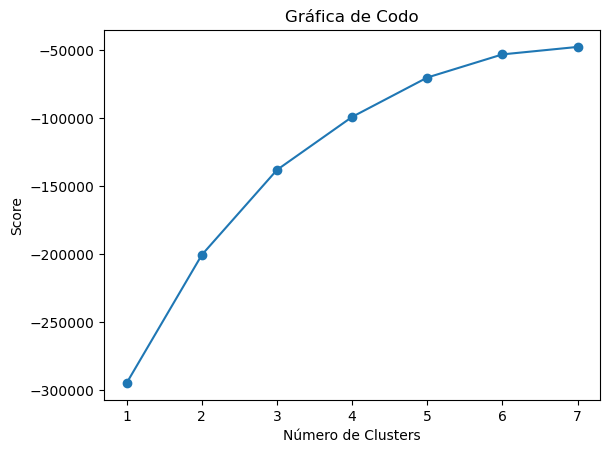

In [82]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [83]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=5, random_state=0)

In [84]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     edad  ingresoAnual  puntuacionGasto  Grupo
0      19            15               39      1
1      21            15               81      4
2      20            16                6      1
3      23            16               77      4
4      31            17               40      1
..    ...           ...              ...    ...
193    38           113               91      0
194    47           120               16      2
195    35           120               79      0
196    45           126               28      2
197    32           126               74      0

[198 rows x 4 columns]


In [85]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        198         |
|  Coeficiente Silhouette  | 0.4486440546272285 |
| Indice Calinski Harabasz | 154.4268834622003  |
|  Indice Davies Bouldin   | 0.8182553158243019 |
+--------------------------+--------------------+


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

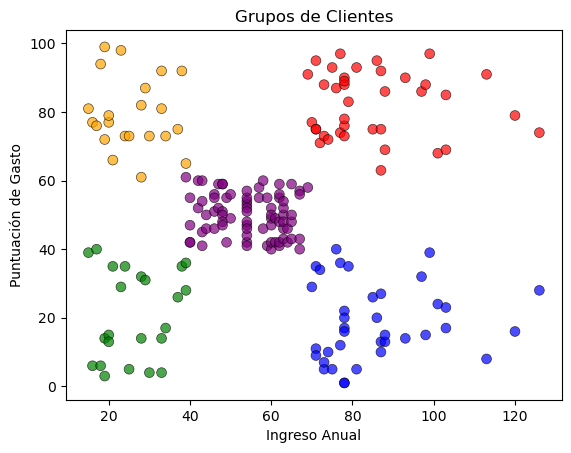

In [86]:
import matplotlib.pyplot as plt

colores = ['red', 'green', 'blue', 'purple', 'orange']

# Scatter plot con colores personalizados
plt.scatter(Datos['ingresoAnual'], Datos['puntuacionGasto'], c=[colores[i] for i in Datos['Grupo']], cmap='viridis', 
            edgecolor='black', linewidth=0.5, alpha=0.7, marker='o', s=50, vmin=0, vmax=4)
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación de Gasto')
plt.title('Grupos de Clientes')
plt.show()


# 7. Interpretar, analizar y documentar los resultados obtenidos

## Análisis de Segmentación de Clientes

El análisis revela cinco segmentos distintos de clientes basados en sus ingresos anuales y puntuaciones de gastos. Estos segmentos ofrecen una comprensión valiosa sobre los comportamientos de gasto de los clientes y pueden guiar estrategias de marketing y retención más efectivas.

1. **Cluster Amarillo (Bajos ingresos, Alta puntuación de gastos)**:
   - Este segmento comprende clientes con bajos ingresos pero que gastan considerablemente.
   - Estos clientes podrían ser considerados como aquellos que valoran los productos o servicios ofrecidos y están dispuestos a gastar a pesar de sus limitaciones financieras.
   - Estrategias de marketing que resalten el valor y la accesibilidad de los productos podrían atraer y retener a estos clientes.

2. **Cluster Verde (Ingresos moderados, Gastos moderados)**:
   - Este segmento incluye clientes con ingresos y gastos moderados, lo que sugiere un equilibrio en su comportamiento de compra.
   - Estos clientes podrían representar una base sólida para la empresa, ya que están dispuestos a gastar sin excesos y mantienen una relación equilibrada entre ingresos y gastos.
   - Estrategias de retención centradas en la calidad del servicio y la experiencia del cliente podrían fortalecer la lealtad de este segmento.

3. **Cluster Azul Claro (Altos ingresos, Baja puntuación de gastos)**:
   - Este segmento está compuesto por clientes con altos ingresos pero que muestran un bajo nivel de gastos.
   - Estos clientes podrían ser considerados como cautelosos o frugales en su comportamiento de compra, prefiriendo ahorrar o invertir en lugar de gastar en productos o servicios.
   - Estrategias personalizadas que resalten el valor de productos exclusivos podrían atraer a estos clientes a gastar más y aprovechar su poder adquisitivo.

4. **Cluster Morado (Ingresos medios, Alta puntuación de gastos)**:
   - Este segmento representa clientes con ingresos moderados pero que gastan considerablemente.
   - Estos clientes podrían ser considerados como aquellos que valoran la experiencia de compra y están dispuestos a gastar en productos o servicios que satisfagan sus necesidades y deseos.
   - Estrategias de marketing específicas que resalten los beneficios y características únicas de los productos podrían atraer y retener a este segmento.

5. **Cluster Rojo (Altos ingresos, Alta puntuación de gastos)**:
   - Este segmento comprende clientes con altos ingresos que también tienen un alto nivel de gastos.
   - Estos clientes representan una oportunidad significativa para la empresa, ya que tienen la capacidad y la disposición de gastar en productos o servicios de alto valor.
   - Estrategias de fidelización, ofertas exclusivas y experiencias personalizadas podrían mantener y aumentar el compromiso y la lealtad de este segmento.


## Análisis de Métricas de Desempeño

 
- **Coeficiente Silhouette**: Es una medida de cuán bien están separados los clusters. Un valor cercano a 1 indica una buena separación entre los clusters. Con un valor de aproximadamente 0.45, podemos interpretar que la separación entre clusters es razonablemente buena.

- **Índice Calinski Harabasz**: Es una medida de la cohesión dentro de los clusters y la separación entre clusters. Valores más altos indican una mejor separación entre clusters. Con un valor de 154.43, sugiere que los clusters están bien definidos y separados.

- **Índice Davies Bouldin**: Esta métrica cuantifica la "bondad" de la agrupación basada en la distancia intra-cluster y la distancia inter-cluster. Valores más bajos indican una mejor separación entre clusters. Con un valor de aproximadamente 0.82, indica que la separación entre clusters es adecuada, aunque podría mejorarse.

Las métricas sugieren que el modelo de clustering ha realizado una buena agrupación de los datos.


# 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/